# Introduction to GeoPandas

First, we'll learn about a package that is core to using geospatial data in Python: GeoPandas. We'll explore the structure of geospatial data (which, turns out, is not too different from DataFrames!), including geometries, shapefiles, and how to save your hard work.

## What is GeoPandas?

[GeoPandas](http://geopandas.org/) is a relatively new package that makes it easier to work with geospatial data in Python. In the last few years it has grown more powerful and stable, allow Python to practioners to more easily and flexibly work with geospatial data in Python, which had been difficult in the past. GeoPandas is now the go-to package for working with `vector` geospatial data in Python. 

> **Protip**: If you work with `raster` data, check out the [rasterio](https://rasterio.readthedocs.io/en/latest/) package. We will cover raster data later.

GeoPandas gives you access to all of the functionality of [pandas](https://pandas.pydata.org/), which is the primary data analysis tool for working with tabular data in Python. GeoPandas extends pandas with attributes and methods for working with geospatial data. So, if you're familiar with pandas, working with geospatial data is a natural next step.

### Import Libraries

Let's start by importing the libraries that we will use. If you haven't already, you can install GeoPandas within this notebook:

In [ ]:
# Install GeoPandas if you don't have it yet
%pip install geopandas

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib # Base python plotting library
import matplotlib.pyplot as plt # Submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

### Read in a Shapefile

As we discussed in the initial geospatial overview, a *shapefile* is one type of geospatial data that holds vector data. 

> To learn more about ESRI Shapefiles, this is a good place to start: [ESRI Shapefile Wiki Page](https://en.wikipedia.org/wiki/Shapefile) 

The tricky thing to remember about shapefiles is that they're actually a collection of 3 to 9+ files together. Here's a list of all the files that can make up a shapefile:
 
* `shp`: The main file that stores the feature geometry
* `shx`: The index file that stores the index of the feature geometry  
* `dbf`: The dBASE table that stores the attribute information of features 
* `prj`: The file that stores the coordinate system information. (should be required!)
* `xml`: Metadata: Stores information about the shapefile.
* `cpg`: Specifies the code page for identifying the character set to be used.

But it remains the most commonly used file format for vector spatial data, and it's really easy to visualize in one go!

Let's try it out with California counties, and use GeoPandas for the first time. We can use a flexible function called `gpd.read_file` to read in many different types of geospatial data. When using it, we'll specify the `shp` file:

In [3]:
# Read in the counties shapefile
counties = gpd.read_file('data/Georgia_Counties/Georgia_Counties.shp')

<Axes: >

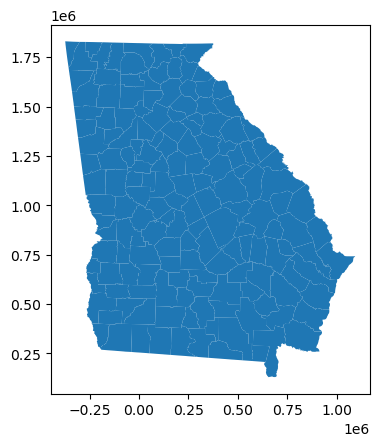

In [4]:
# Plot out counties
counties.plot()

Bam! Amazing! We're off to a running start.

## Exploring the GeoPandas GeoDataFrame

Before we get in too deep, let's discuss what a *GeoDataFrame* is and how it's different from a pandas *DataFrame*.

A [GeoPandas GeoDataFrame](https://geopandas.org/data_structures.html#geodataframe), or `gdf` for short, is just like a pandas DataFrame (`df`) but with an extra geometry column as well as accompanying methods and attributes that work on that column. Let's emphasize this point, because it's important:

> A [GeoPandas GeoDataFrame](https://geopandas.org/data_structures.html#geodataframe), or `gdf` for short, is just like a pandas DataFrame (`df`) but with an extra geometry column as well as accompanying methods and attributes that work on that column.

This means all the methods and attributes of a pandas DataFrame also work on a GeoPandas GeoDataFrame!

With that in mind, let's start exploring our dataframe just like we would do in pandas.

In [5]:
# Find the number of rows and columns in counties
counties.shape

(159, 23)

In [6]:
# Look at the first couple of rows in our geodataframe
counties.head(3)

,OBJECTID_1,STATEFP10,COUNTYFP10,GEOID10,NAME10,NAMELSAD10,totpop10,WFD,RDC_AAA,MNGWPD,...,F8HR_NA,Reg_Comm,Acres,Sq_Miles,Label,GlobalID,LINC_Regio,ShapeSTAre,ShapeSTLen,geometry
0,1,13,173,13173,Lanier,Lanier County,10078,N,N,N,...,N,Southern Georgia,127874.0,199.802994,LANIER,{7D637994-1D29-4646-A85C-439C1A06EA0E},11,5.570179e+09,407122.504849,"POLYGON ((381476.193 345593.437, 381443.601 34..."
1,2,13,029,13029,Bryan,Bryan County,30233,N,N,N,...,N,Coastal Regional Commission,291269.0,455.108002,BRYAN,{AB662CC0-3C43-4DFC-A03B-ED6CA5322980},12,1.268770e+10,915848.749662,"POLYGON ((892447.553 705332.815, 892440.514 70..."
2,3,13,001,13001,Appling,Appling County,18236,N,N,N,...,N,Heart of Georgia Altamaha,328037.0,512.557983,APPLING,{DE5A63BB-4A0F-47A0-8306-85F49CF71F18},9,1.428931e+10,692363.507349,"POLYGON ((565486.255 668648.88, 573969.848 668..."


In [7]:
# Look at all the variables included in our data
counties.columns

Index(['OBJECTID_1', 'STATEFP10', 'COUNTYFP10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'totpop10', 'WFD', 'RDC_AAA', 'MNGWPD', 'MPO', 'MSA',
       'F1HR_NA', 'F8HR_NA', 'Reg_Comm', 'Acres', 'Sq_Miles', 'Label',
       'GlobalID', 'LINC_Regio', 'ShapeSTAre', 'ShapeSTLen', 'geometry'],
      dtype='object')

## Plot the GeoDataFrame

We're able to plot our GeoDataFrame because of the extra `geometry` column. What exactly does this column provide?

### GeoPandas Geometries

There are three main types of geometries that can be associated with your GeoDataFrame: points, lines and polygons.

<img src ="https://datacarpentry.org/organization-geospatial/fig/dc-spatial-vector/pnt_line_poly.png" width="450"></img>

In the GeoDataFrame, these geometries are encoded in a format known as [Well-Known Text (WKT)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry). Consider the following examples:

- POINT (30 10)
- LINESTRING (30 10, 10 30, 40 40)
- POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))

In each case, coordinates are separated by a spaces, and coordinate pairs are separated by commas.

Your geodataframe may also include the variants **multipoints, multilines, and multipolgyons** if the row-level feature of interest is comprised of multiple parts. For example, a GeoDataFrame of states, where one row represents one state, would have a POLYGON geometry for Utah but MULTIPOLYGON for Hawaii, which includes many islands.

Note that, it's OK to mix and match geometries of the same family, e.g., POLYGON and MULTIPOLYGON, in the same GeoDataFrame.

---

### Challenge

What kind of geometry would a GeoDataFrame containing roads have? What about one that includes landmarks in Atlanta?

---

You can check the types of geometries in a GeoDataFrame or a subset of the GeoDataFrame by combining the `type` and `unique` methods:

In [9]:
# Let's check to make sure that we only have polygons and multipolygons 
counties['geometry'].type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

Just like with other plots you can make in Python, we can start customizing our map with colors, size, etc.

In [ ]:
# We can run the following line of code to get more info about the parameters we can specify:
?counties.plot

<Axes: >

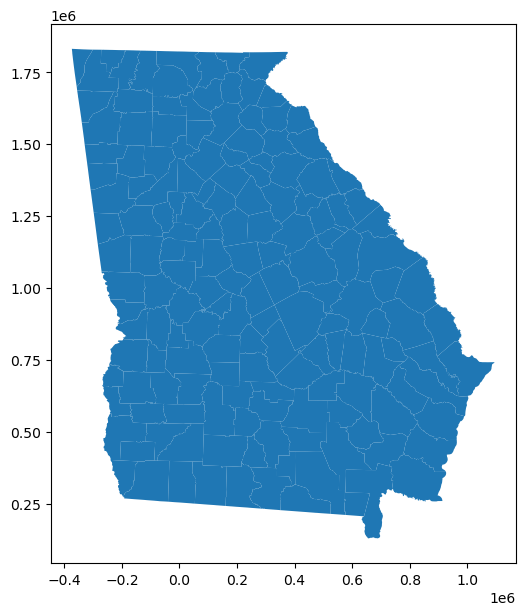

In [10]:
# Make the figure size bigger
counties.plot(figsize=(6, 9))

<Axes: >

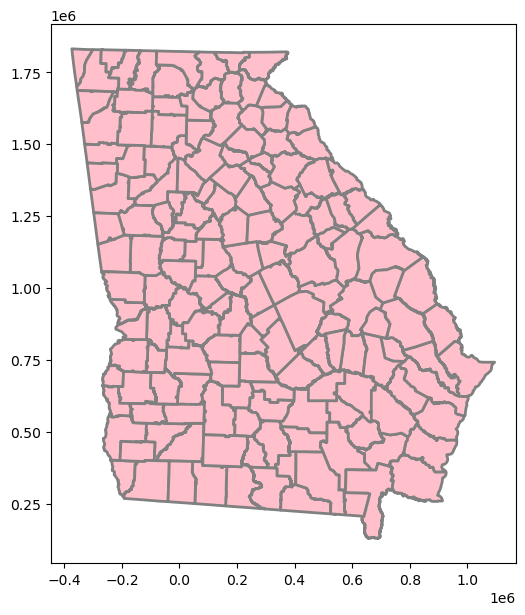

In [11]:
# Customize our plot further
counties.plot(figsize=(6, 9), 
              edgecolor='grey', # Grey colored border lines
              facecolor='pink', # Fill in our counties as pink
              linewidth=2)      # Make the linewidth larger

## Subset the GeoDataframe

Let's subset Fulton County from our GeoDataFrame:

In [12]:
# See all county names included in our dataset
counties['NAME10'].values

array(['Lanier', 'Bryan', 'Appling', 'Rabun', 'Bleckley', 'Fayette',
       'Jefferson', 'Seminole', 'Camden', 'Glynn', 'Polk', 'Morgan',
       'Talbot', 'Schley', 'Union', 'Wilcox', 'Ware', 'Clarke', 'Jones',
       'Carroll', 'Rockdale', 'Dade', 'Murray', 'Cobb', 'Columbia',
       'Forsyth', 'Baldwin', 'Walker', 'Emanuel', 'Gilmer', 'Warren',
       'Elbert', 'Clayton', 'Brantley', 'Chatham', 'Peach', 'Echols',
       'Evans', 'Quitman', 'Irwin', 'Burke', 'Henry', 'Liberty',
       'Madison', 'Toombs', 'Monroe', 'Clinch', 'Oconee', 'Berrien',
       'Charlton', 'Cook', 'Pierce', 'Early', 'Johnson', 'Taylor',
       'Dooly', 'Dawson', 'Lee', 'Bartow', 'Wilkes', 'Lamar', 'Haralson',
       'Coffee', 'Glascock', 'Richmond', 'Twiggs', 'White', 'Miller',
       'Meriwether', 'Newton', 'Mitchell', 'Gwinnett', 'Greene', 'Sumter',
       'Randolph', 'Franklin', 'Pulaski', 'Brooks', 'Chattooga', 'Bacon',
       'Turner', 'Lowndes', 'Atkinson', 'Towns', 'Screven', 'Troup',
       'Laurens', 

It looks like Fulton county is specified as "Fulton" in this dataset.

So, let's create a new GeoDataFrame called `Fulton_county` that is a subset of our counties GeoDataFrame:

In [13]:
Fulton_county = counties.loc[counties['NAME10'] == 'Fulton'].copy().reset_index(drop=True)

In [14]:
Fulton_county

,OBJECTID_1,STATEFP10,COUNTYFP10,GEOID10,NAME10,NAMELSAD10,totpop10,WFD,RDC_AAA,MNGWPD,...,F8HR_NA,Reg_Comm,Acres,Sq_Miles,Label,GlobalID,LINC_Regio,ShapeSTAre,ShapeSTLen,geometry
0,90,13,121,13121,Fulton,Fulton County,920581,N,Y,Y,...,Y,Atlanta Regional Commission,341906.0,534.229004,FULTON,{44A3942A-9608-4E68-A927-A38721FF266D},3,1.489345e+10,918983.645116,"POLYGON ((-38253.577 1334236.642, -38254.436 1..."


<Axes: >

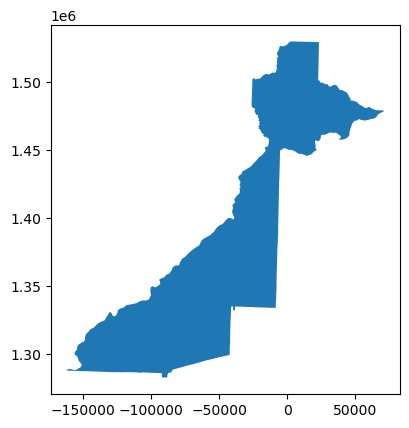

In [15]:
# Plot our newly subsetted GeoDataFrame
Fulton_county.plot()

Nice! Looks like we have what we were looking for.

## Save Your Data

Let's not forget to save out our Fulton County geodataframe `Fulton_county`. This way we won't need to repeat the processing steps and attribute join we did above.

We can save it as a shapefile:

In [ ]:
Fulton_county.to_file("data/Fulton_county.shp")  # Change path when necessary

One of the problems of saving to a shapefile is that our column names get truncated to 10 characters (this is a shapefile limitation). 

Instead of renaming all columns with obscure names that are less than 10 characters, we can save our GeoDataFrame to spatial data file formats that do not have this limation, such as [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) or [GPKG](https://en.wikipedia.org/wiki/GeoPackage) (geopackage) files.

These formats have the added benefit of outputting only one file in contrast to the multi-file shapefile format.

In [ ]:
Fulton_county.to_file("data/Fulton_county.json", driver="GeoJSON") # Change path when necessary

In [ ]:
Fulton_county.to_file("data/Fulton_county.gpkg", driver="GPKG") # Change path when necessary

You can read these in, just as you would a shapefile with `gpd.read_file`:

In [ ]:
Fulton_county_test2 = gpd.read_file("data/Fulton_county.json")  # Change path when necessary
Fulton_county_test2.plot()

In [ ]:
Fulton_county_test = gpd.read_file("data/Fulton_county.gpkg")  # Change path when necessary
Fulton_county_test.plot()

There are also many other formats we could use for data output.

**NOTE**: If you're working with point data (i.e. a single latitude and longitude value per feature),
then CSV might be a good option!

## Overview

In this lesson, we learned about:

- The `geopandas` package
- Reading in shapefiles
    - `gpd.read_file`
- GeoDataFrame structures
    - `shape`, `head`, `columns`
- Plotting GeoDataFrames
    - `plot`
- Subsetting GeoDatFrames
    - `loc`
- Saving out GeoDataFrames
    - `to_file`